<a href="https://colab.research.google.com/github/nyunu/study/blob/main/%EB%B2%94%EC%A3%84_%EB%B0%8F_CCTV_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# **범죄 데이터**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/범죄데이터/5대+범죄+발생현황_20230306232327.csv")
df2 = pd.read_csv("/content/drive/MyDrive/범죄데이터/경찰청_전국 경찰서별 강력범죄 발생 현황_20211231.csv")
df3 = pd.read_csv("/content/drive/MyDrive/범죄데이터/자치구별+연령별+인구(추계인구)_20230308014644.csv", encoding = 'utf-8')

In [ ]:
df3.head()

,자치구별(1),자치구별(2),성별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,...,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17,2021.18,2021.19,2021.20
0,자치구별(1),자치구별(2),성별(1),계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,자치구별(1),자치구별(2),성별(1),소계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95세 이상+
2,합계,소계,계,9501528,258523,335174,352442,384431,647961,836224,...,780114,718575,727734,545908,398468,288219,187643,87992,29896,7513
3,합계,소계,남자,4597665,133121,171740,181190,194736,298266,404583,...,381526,350150,343898,255271,182811,129213,77664,30062,7689,1644
4,합계,소계,여자,4903863,125402,163434,171252,189695,349695,431641,...,398588,368425,383836,290637,215657,159006,109979,57930,22207,5869


In [ ]:
df3 = df3[df3['성별(1)'] == "계"][['자치구별(2)', '2021']]
df3.rename(columns={'자치구별(2)':'자치구별'}, inplace = True)
df3

,자치구별,2021
2,소계,9501528
5,종로구,149705
8,중구,127427
11,용산구,225647
14,성동구,287580
17,광진구,349926
20,동대문구,347913
23,중랑구,381449
26,성북구,436199
29,강북구,294628


## **5대 범죄 발생현황 데이터 사전처리**

In [ ]:
df1.head()

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,소계,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,절도,폭력,폭력
2,자치구별(1),자치구별(2),발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
3,합계,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
4,합계,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248


In [ ]:
# 데이터 컬럼 정리
df1.drop('자치구별(1)', axis = 1, inplace = True)
df1.columns = list(df1.iloc[1,] + "_" + df1.iloc[2,])
df1.rename(columns={'자치구별(2)_자치구별(2)':'자치구별'}, inplace = True)
df1.drop([0,1,2], inplace = True)
df1.reset_index(drop = True, inplace = True)
df1.head()

,자치구별,소계_발생,소계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
1,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
2,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
3,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
4,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926


In [ ]:
# 각 구별 인구수 붙이기
df1 = pd.merge(df1, df3, how='outer', on='자치구별')
df1.rename(columns={'2021':'인구수'}, inplace = True)

In [ ]:
# 데이터 타입 변경
df1_1 = df1['자치구별']
df1_2 = df1.drop('자치구별', axis = 1).astype('int')

df1 = pd.concat([df1_1, df1_2], axis = 1)

In [ ]:
# 검거율 컬럼 생성
df1['검거율'] = df1['소계_검거'] / df1['소계_발생']
df1.head()

,자치구별,소계_발생,소계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거,인구수,검거율
0,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388,9501528,0.721139
1,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248,149705,1.015855
2,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224,127427,0.724222
3,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069,225647,0.696766
4,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926,287580,0.714962


In [ ]:
df4 = pd.read_excel("/content/drive/MyDrive/범죄데이터/시내주요기관(경찰·소방관서)_20230308103120.xlsx")
df4.columns = list(df4.iloc[0,])
df4.drop(['자치구별(1)', '소방본부', '소방서', '119안전센터'], axis = 1, inplace = True)
df4.rename(columns={'자치구별(2)':'자치구별'}, inplace = True)
df4.drop(0, inplace = True)
df4.reset_index(drop = True, inplace = True)
df4.head()

/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별,경찰청,경찰서,지구대파출소치안센터
0,소계,2.0,31.0,407.0
1,종로구,1.0,2.0,22.0
2,중구,0.0,2.0,18.0
3,용산구,0.0,1.0,12.0
4,성동구,0.0,1.0,15.0


In [ ]:
df1 = pd.merge(df1, df4, how='outer', on='자치구별')
df1.head()

,자치구별,소계_발생,소계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거,인구수,검거율,경찰청,경찰서,지구대파출소치안센터
0,소계,80445.0,58012.0,124.0,112.0,122.0,116.0,4911.0,4446.0,33531.0,17950.0,41757.0,35388.0,9501528.0,0.721139,2.0,31.0,407.0
1,종로구,2712.0,2755.0,6.0,3.0,4.0,4.0,156.0,757.0,1079.0,743.0,1467.0,1248.0,149705.0,1.015855,1.0,2.0,22.0
2,중구,2861.0,2072.0,6.0,6.0,6.0,6.0,161.0,97.0,1279.0,739.0,1409.0,1224.0,127427.0,0.724222,0.0,2.0,18.0
3,용산구,2381.0,1659.0,3.0,2.0,1.0,1.0,141.0,103.0,945.0,484.0,1291.0,1069.0,225647.0,0.696766,0.0,1.0,12.0
4,성동구,2112.0,1510.0,3.0,4.0,4.0,1.0,110.0,82.0,905.0,497.0,1090.0,926.0,287580.0,0.714962,0.0,1.0,15.0


In [ ]:
df1 = df1.astype({'경찰청':'int', '경찰서':'int', '지구대파출소치안센터':'int'})

In [ ]:
df1['치안기관개수'] = df1['경찰청'] + df1['경찰서'] + df1['지구대파출소치안센터']
df1.drop(26, inplace = True)

## **경찰청별 강력범죄 발생 데이터 사전처리**

In [ ]:
df2.head()

,발생년도,경찰서,살인,강도,절도,폭력
0,2021,서울중부경찰서,4,3,765,945
1,2021,서울종로경찰서,3,2,513,815
2,2021,서울남대문경찰서,2,3,514,464
3,2021,서울서대문경찰서,3,2,1027,1109
4,2021,서울혜화경찰서,3,2,566,652


In [ ]:
df2['총범죄수'] = df2['살인'] + df2['강도'] + df2['절도'] + df2['폭력']
df2.drop('발생년도', axis = 1, inplace = True)
df2.head()

,경찰서,살인,강도,절도,폭력,총범죄수
0,서울중부경찰서,4,3,765,945,1717
1,서울종로경찰서,3,2,513,815,1333
2,서울남대문경찰서,2,3,514,464,983
3,서울서대문경찰서,3,2,1027,1109,2141
4,서울혜화경찰서,3,2,566,652,1223


### **발생 및 검거 건수**

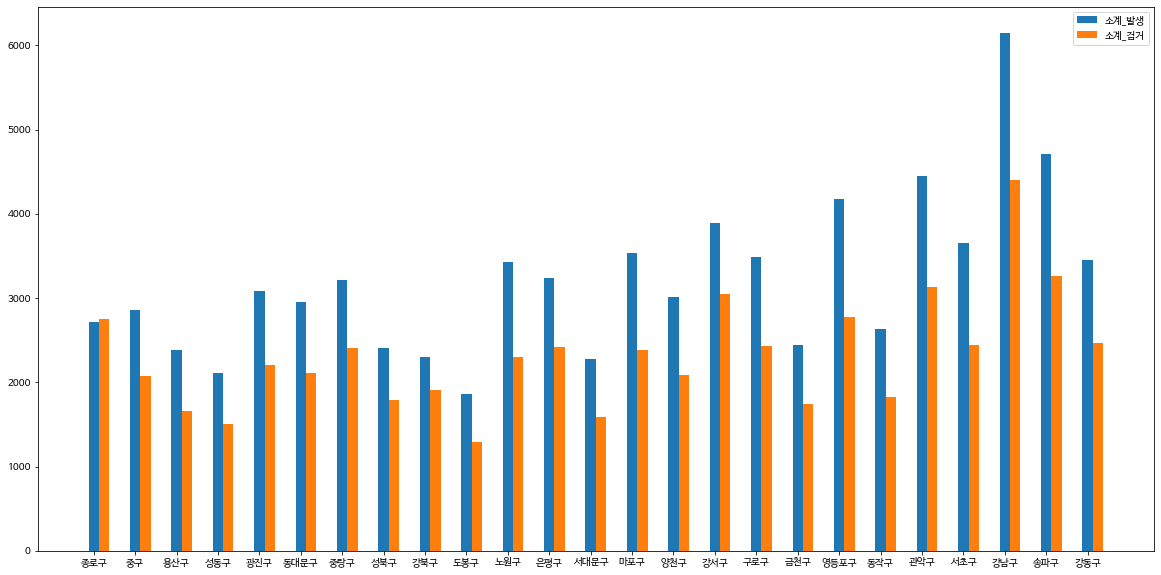

In [ ]:
w = 0.25
index = np.arange(25)

plt.figure(figsize = (20, 10))
plt.bar(index, df1.loc[1:26, '소계_발생'], width = w)
plt.bar(index + w, df1.loc[1:26, '소계_검거'], width = w)
plt.xticks(index, df1.loc[1:26, '자치구별'])
plt.legend(["소계_발생", "소계_검거"])
plt.show()

### **검거율 확인**

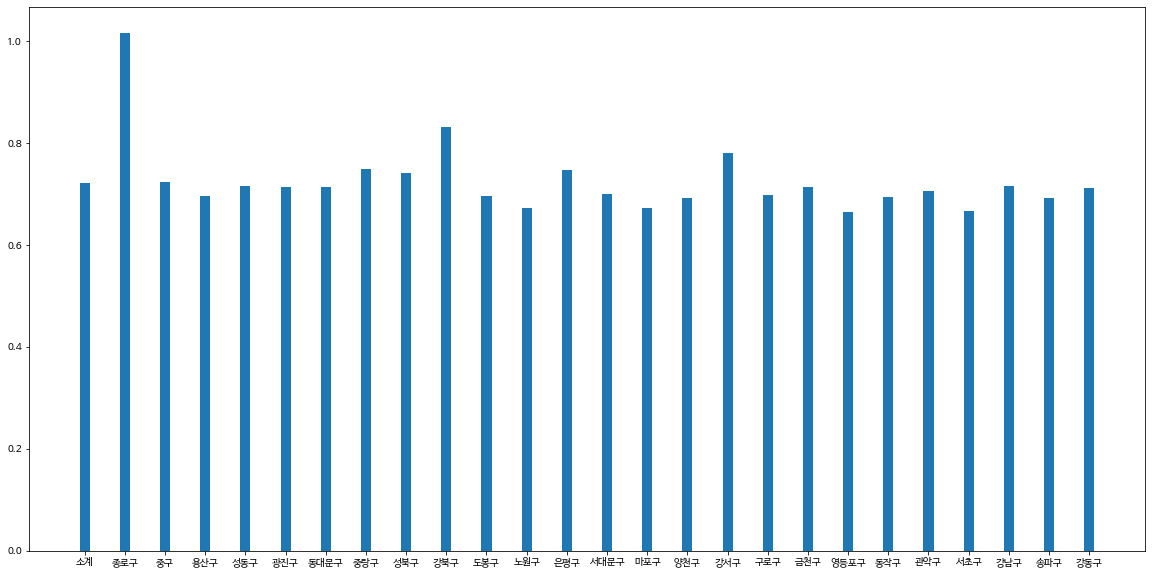

In [ ]:
plt.figure(figsize = (20, 10))
index = np.arange(df1.shape[0])
plt.bar(index, df1['검거율'], width = w)
plt.xticks(index, df1['자치구별'])
plt.show()

In [ ]:
df1.sort_values('검거율')[['자치구별', '검거율']]

,자치구별,검거율
19,영등포구,0.664513
22,서초구,0.667123
14,마포구,0.672034
11,노원구,0.672117
15,양천구,0.691542
24,송파구,0.692830
20,동작구,0.695173
10,도봉구,0.695699
3,용산구,0.696766
17,구로구,0.697361


### **치안기관**

In [ ]:
df1.head()

,자치구별,소계_발생,소계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거,인구수,검거율,경찰청,경찰서,지구대파출소치안센터,치안기관개수
0,소계,80445.0,58012.0,124.0,112.0,122.0,116.0,4911.0,4446.0,33531.0,17950.0,41757.0,35388.0,9501528.0,0.721139,2,31,407,440
1,종로구,2712.0,2755.0,6.0,3.0,4.0,4.0,156.0,757.0,1079.0,743.0,1467.0,1248.0,149705.0,1.015855,1,2,22,25
2,중구,2861.0,2072.0,6.0,6.0,6.0,6.0,161.0,97.0,1279.0,739.0,1409.0,1224.0,127427.0,0.724222,0,2,18,20
3,용산구,2381.0,1659.0,3.0,2.0,1.0,1.0,141.0,103.0,945.0,484.0,1291.0,1069.0,225647.0,0.696766,0,1,12,13
4,성동구,2112.0,1510.0,3.0,4.0,4.0,1.0,110.0,82.0,905.0,497.0,1090.0,926.0,287580.0,0.714962,0,1,15,16


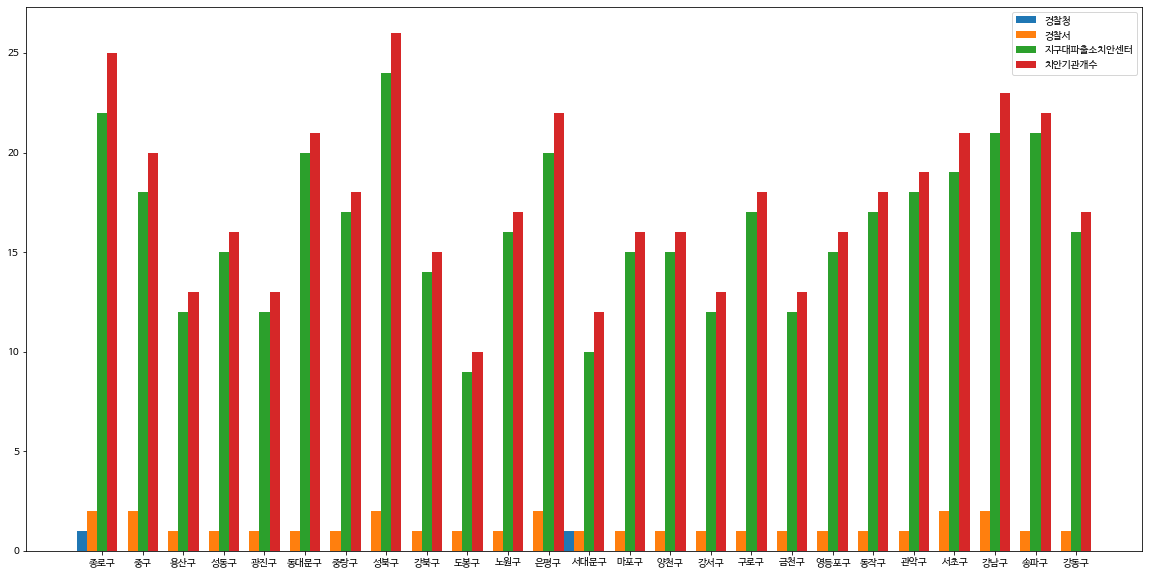

In [ ]:
w = 0.25
index = np.arange(df1.shape[0] - 1)

plt.figure(figsize = (20, 10))
plt.bar(index - w * 2, df1.loc[1:26, '경찰청'], width = w)
plt.bar(index - w, df1.loc[1:26, '경찰서'], width = w)
plt.bar(index, df1.loc[1:26, '지구대파출소치안센터'], width = w)
plt.bar(index + w, df1.loc[1:26, '치안기관개수'], width = w)
plt.xticks(index, df1.loc[1:26, '자치구별'])
plt.legend(["경찰청", "경찰서", '지구대파출소치안센터', '치안기관개수'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_nor = df1.copy()
df1_new_1 = df1_nor['자치구별']
df1_new_2 = df1_nor.drop('자치구별', axis = 1)
df1_new_2[:] = scaler.fit_transform(df1_new_2[:])
df1_nor = pd.concat([df1_new_1, df1_new_2], axis = 1)
df1_nor.drop(0, inplace = True)
df1_nor.head()

,자치구별,소계_발생,소계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거,인구수,검거율,경찰청,경찰서,지구대파출소치안센터,치안기관개수
1,종로구,0.010842,0.025759,0.04065,0.018018,0.024793,0.026087,0.017359,0.158147,0.009371,0.020883,0.011167,0.011495,0.002377,1.000000,0.5,0.033333,0.032663,0.034884
2,중구,0.012738,0.013717,0.04065,0.045045,0.041322,0.043478,0.018392,0.007531,0.015477,0.020656,0.009744,0.010800,0.000000,0.169946,0.0,0.033333,0.022613,0.023256
3,용산구,0.006630,0.006435,0.01626,0.009009,0.000000,0.000000,0.014259,0.008900,0.005281,0.006145,0.006847,0.006312,0.010478,0.091799,0.0,0.000000,0.007538,0.006977
4,성동구,0.003207,0.003808,0.01626,0.027027,0.024793,0.000000,0.007853,0.004108,0.004060,0.006885,0.001914,0.002172,0.017085,0.143589,0.0,0.000000,0.015075,0.013953
5,광진구,0.015614,0.016009,0.03252,0.018018,0.024793,0.026087,0.028105,0.022136,0.019598,0.021509,0.010897,0.012421,0.023736,0.138898,0.0,0.000000,0.007538,0.006977


### **범죄 발생 대비 치안기관의 개수**
- 강서구가 가장 낮은 수치 기록
- 범죄 발생 대비 치안기관의 개수가 부족함을 확인할 수 있음

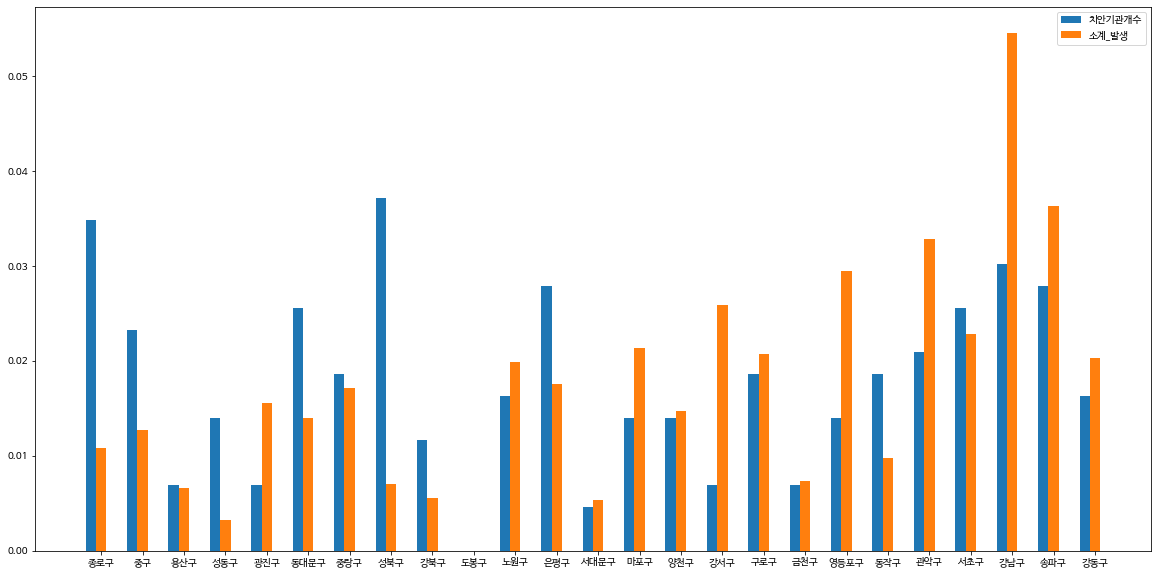

In [ ]:
w = 0.25
index = np.arange(df1_nor.shape[0])

plt.figure(figsize = (20, 10))
plt.bar(index - w, df1_nor['치안기관개수'], width = w)
plt.bar(index , df1_nor['소계_발생'], width = w)
plt.xticks(index, df1_nor['자치구별'])
plt.legend(["치안기관개수", "소계_발생"])
plt.show()

In [ ]:
# 사건 발생 대비 치안기관의 개수
df1_nor['발생대비치안기관개수'] = df1_nor['치안기관개수'] / df1_nor['소계_발생']

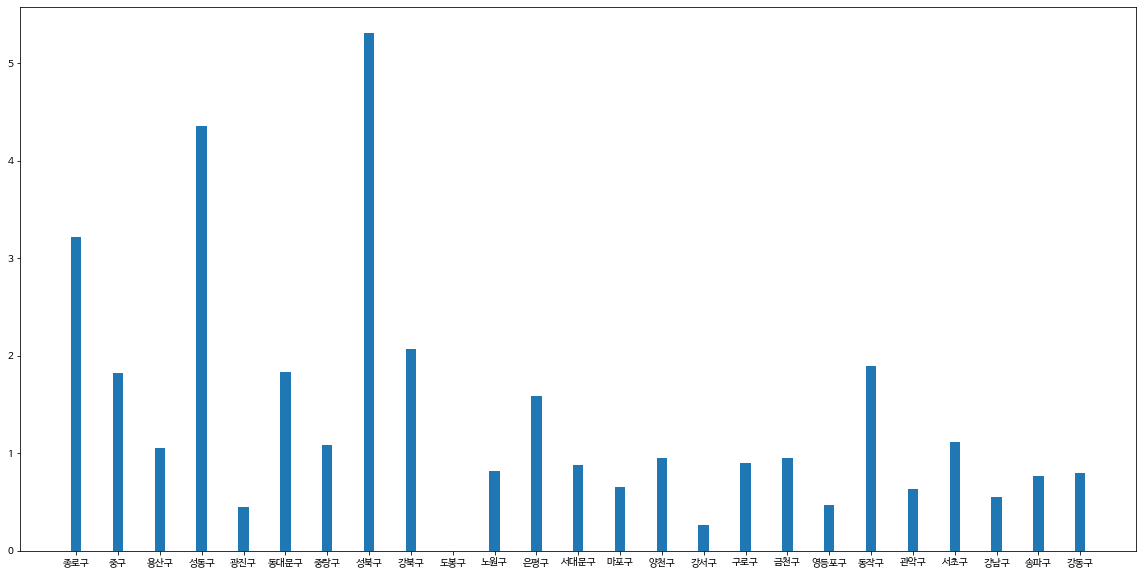

In [ ]:
plt.figure(figsize = (20, 10))
index = np.arange(df1_nor.shape[0])
plt.bar(index, df1_nor['발생대비치안기관개수'], width = w)
plt.xticks(index, df1_nor['자치구별'])
plt.show()

In [ ]:
df1_nor.sort_values('발생대비치안기관개수')[['자치구별', '발생대비치안기관개수']].head()

,자치구별,발생대비치안기관개수
16,강서구,0.269287
5,광진구,0.446836
19,영등포구,0.472848
23,강남구,0.554322
21,관악구,0.636533


### **검거수 대비 치안기관의 개수**
- 강서구가 가장 낮은 수치를 기록
- 검거하는 사건 대비 치안기관의 개수가 매우 적음을 확인할 수 있음

In [ ]:
df1_nor['검거대비치안기관개수'] = df1_nor['치안기관개수'] / df1_nor['소계_검거']

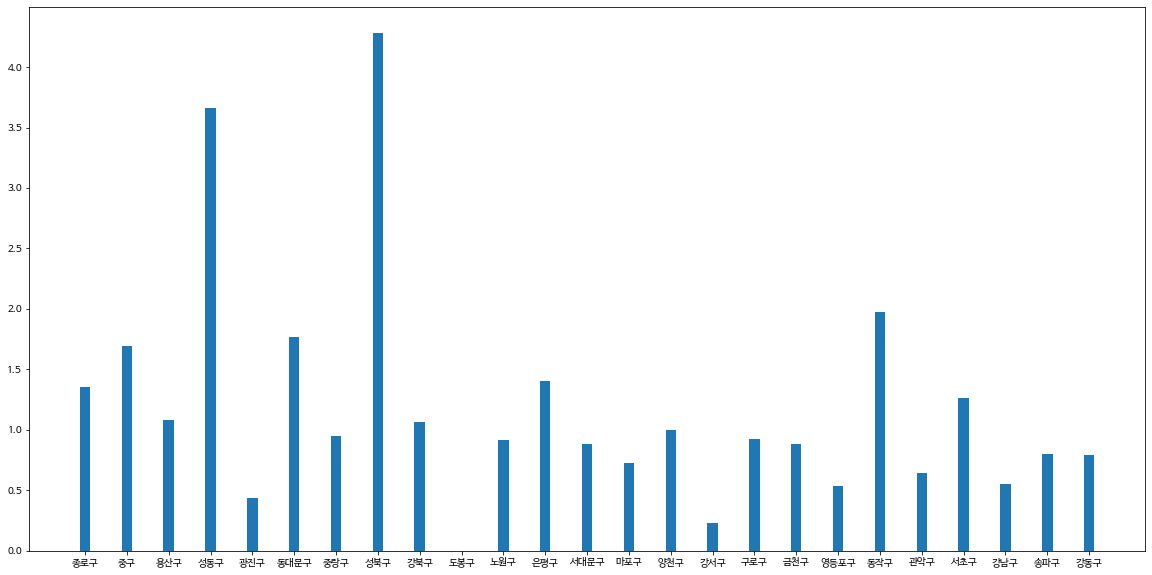

In [ ]:
plt.figure(figsize = (20, 10))
index = np.arange(df1_nor.shape[0])
plt.bar(index, df1_nor['검거대비치안기관개수'], width = w)
plt.xticks(index, df1_nor['자치구별'])
plt.show()

In [ ]:
df1_nor['검거대비치안기관개수'].mean()

1.2430712791557241

In [ ]:
df1_nor.sort_values('검거대비치안기관개수')[['자치구별', '검거대비치안기관개수']].head()

,자치구별,검거대비치안기관개수
16,강서구,0.226118
5,광진구,0.435801
19,영등포구,0.533657
23,강남구,0.552604
21,관악구,0.645174


### **인구수 대비 발생비율**

#### 주민등록상 등록 인구수
- 인구수와 발생 간의 상관관계는 약 0.7로 꽤 높은 수치를 기록함
- 따라서, 인구수가 증가함과 범죄 발생 건수의 증가가 관계가 있을 수 있다라는 가정이 가능

In [ ]:
df1_nor.head()

,자치구별,소계_발생,소계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,...,폭력_발생,폭력_검거,인구수,검거율,경찰청,경찰서,지구대파출소치안센터,치안기관개수,발생대비치안기관개수,검거대비치안기관개수
1,종로구,0.010842,0.025759,0.04065,0.018018,0.024793,0.026087,0.017359,0.158147,0.009371,...,0.011167,0.011495,0.002377,1.000000,0.5,0.033333,0.032663,0.034884,3.217532,1.354233
2,중구,0.012738,0.013717,0.04065,0.045045,0.041322,0.043478,0.018392,0.007531,0.015477,...,0.009744,0.010800,0.000000,0.169946,0.0,0.033333,0.022613,0.023256,1.825732,1.695403
3,용산구,0.006630,0.006435,0.01626,0.009009,0.000000,0.000000,0.014259,0.008900,0.005281,...,0.006847,0.006312,0.010478,0.091799,0.0,0.000000,0.007538,0.006977,1.052337,1.084129
4,성동구,0.003207,0.003808,0.01626,0.027027,0.024793,0.000000,0.007853,0.004108,0.004060,...,0.001914,0.002172,0.017085,0.143589,0.0,0.000000,0.015075,0.013953,4.351329,3.663953
5,광진구,0.015614,0.016009,0.03252,0.018018,0.024793,0.026087,0.028105,0.022136,0.019598,...,0.010897,0.012421,0.023736,0.138898,0.0,0.000000,0.007538,0.006977,0.446836,0.435801


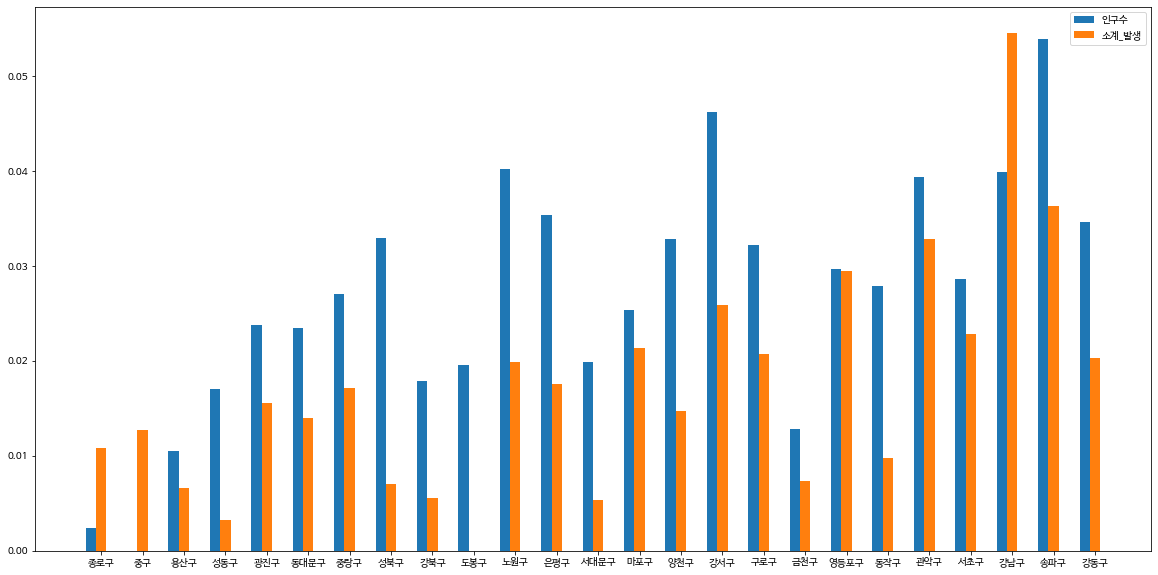

In [ ]:
w = 0.25
index = np.arange(df1_nor.shape[0])

plt.figure(figsize = (20, 10))
plt.bar(index - w, df1_nor['인구수'], width = w)
plt.bar(index , df1_nor['소계_발생'], width = w)
plt.xticks(index, df1_nor['자치구별'])
plt.legend(["인구수", "소계_발생"])
plt.show()

In [ ]:
# 발생과 인구수의 상관관계
df1_nor.corr().loc['소계_발생', '인구수']

0.6588786702218511

#### 유동 인구수

# **소득 데이터**

In [ ]:
income = pd.read_excel("/content/drive/MyDrive/범죄데이터/2020-BR-02_서울시 청년 불평등 관련 인식조사_Rawdata.xlsx")
income.head()

,no,SQ1,SQ2,SQ2_1_1,SQ2_1_2,SQ3,SQ3_1,A1_1,A1_2,A1_3,...,DQ1_2,D2_1,D2_2,DQ2_1,DQ2_2,D3_1,D3_2,D4_1,D4_2,D5_1
0,1,1,1,19,4,33,2,5,5,4,...,1,NaN,NaN,6,1.0,6,1.0,14.0,1.0,3
1,2,1,1,1,1,27,1,4,4,2,...,1,NaN,NaN,4,1.0,4,1.0,15.0,7.0,3
2,4,1,1,7,3,26,1,4,5,4,...,2,NaN,NaN,6,1.0,6,1.0,6.0,1.0,3
3,5,1,1,23,5,36,2,3,3,3,...,1,NaN,NaN,6,1.0,8,1.0,1.0,8.0,3
4,6,2,1,4,2,21,1,4,4,5,...,2,NaN,NaN,6,1.0,4,1.0,1.0,1.0,4


In [ ]:
income = income[['SQ2_1_1', 'E3', 'E4_1', 'E4_2_1', 'E4_3', 'E4_4']]
income.head()

,SQ2_1_1,E3,E4_1,E4_2_1,E4_3,E4_4
0,19,1,1.0,1.0,2.0,8.0
1,1,2,NaN,NaN,NaN,NaN
2,7,1,1.0,2.0,2.0,5.0
3,23,1,1.0,1.0,3.0,6.0
4,4,3,NaN,NaN,NaN,NaN


In [ ]:
income.shape

(1000, 6)

In [ ]:
# 분류 문제를 이용하여 소득수준을 예측해보고자 했으나 다른 열들에도 결측치가 너무 많아 불가능함
income.isnull().sum()

SQ2_1_1      0
E3           0
E4_1       405
E4_2_1     470
E4_3       405
E4_4       405
dtype: int64

In [ ]:
income = income[['SQ2_1_1','E4_4']]
income.head()

,SQ2_1_1,E4_4
0,19,8.0
1,1,NaN
2,7,5.0
3,23,6.0
4,4,NaN


In [ ]:
income.dropna(inplace = True)
income.shape

(595, 2)

In [ ]:
income.loc[income['E4_4'] == 1.0, 'E4_4'] = '~100'